# KNN(K-Nearest Neighors)

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

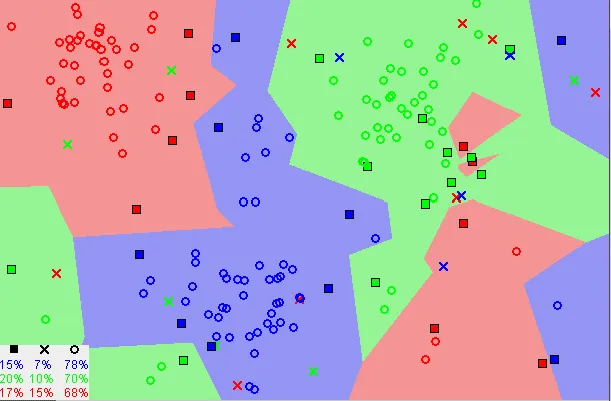

Image showing how similar data points typically exist close to each other

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

# KNN ALgorithm

1. Load the data
2. Initialize K to your chosen number of neighbors

3. For each example in the data

3.1 Calculate the distance between the query example and the current example from the data.

3.2 Add the distance and the index of the example to an ordered collection

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels

# KNN Implementation

In [1]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 33 year old like pineapples on their pizza?
    clf_query = [33]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
    )

if __name__ == '__main__':
    main()

# Choosing the right value for K

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

## Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.

2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

# Advantages

1. The algorithm is simple and easy to implement.

2. There’s no need to build a model, tune several parameters, or make additional assumptions.

3. The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).

# Disadvantages

The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

# Summary

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

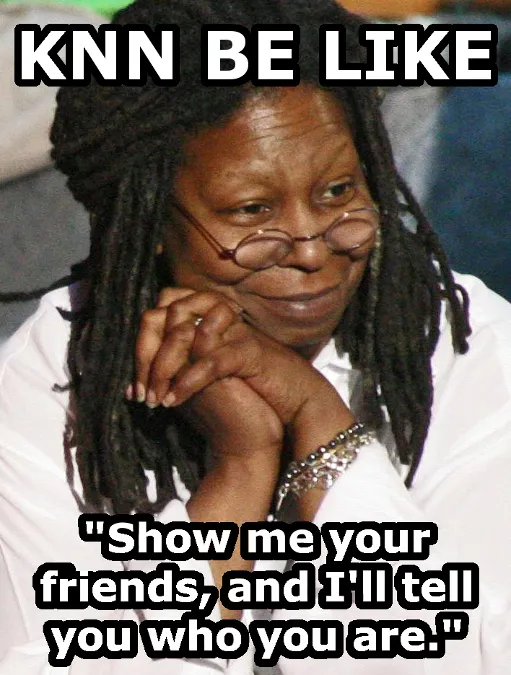

